In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns
import qgrid
import matplotlib.patches as mpatches
fields_values=['Date','Open','High', 'Low','IndexClose','VixClose']
IndexData= pd.read_csv('C:/users/hajyhass/downloads/ExpandedData.csv', sep=',', usecols=fields_values)

In [2]:
IndexData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 6 columns):
Date          750 non-null object
Open          750 non-null float64
High          750 non-null float64
Low           750 non-null float64
IndexClose    750 non-null float64
VixClose      750 non-null float64
dtypes: float64(5), object(1)
memory usage: 35.3+ KB


In [3]:
IndexData.Date = pd.to_datetime(IndexData.Date)
IndexData.set_index('Date', inplace=True)

In [4]:
IndexData=IndexData.drop(['Open','High','Low'],axis=1)


In [5]:
IndexData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 750 entries, 2017-01-30 to 2020-01-22
Data columns (total 2 columns):
IndexClose    750 non-null float64
VixClose      750 non-null float64
dtypes: float64(2)
memory usage: 17.6 KB


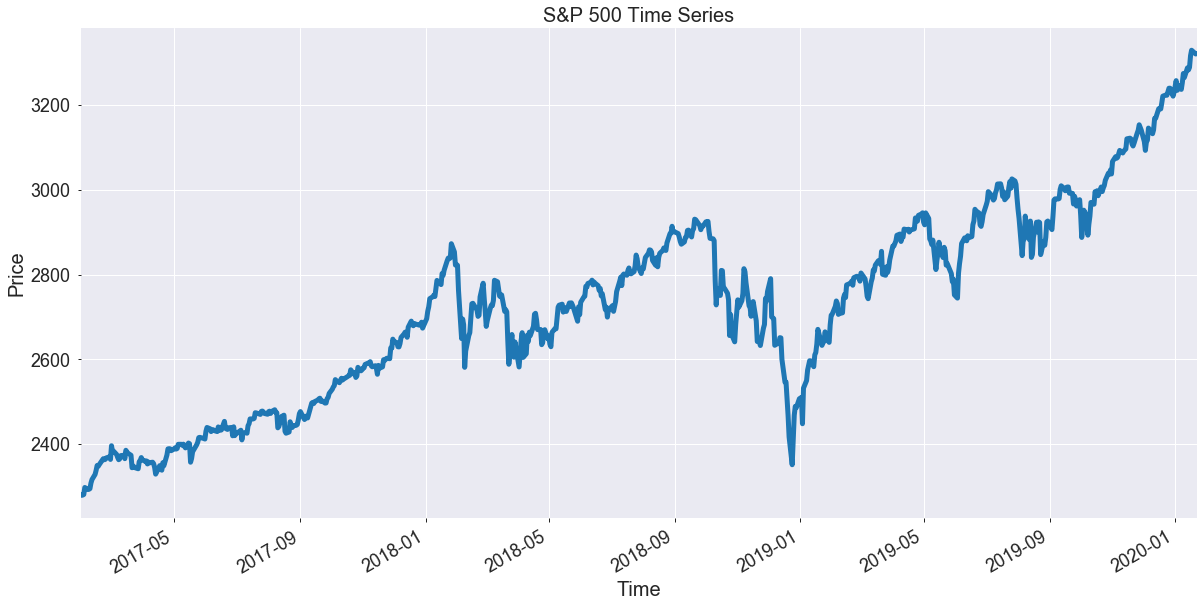

In [6]:
IndexData['IndexClose'].plot(figsize=(20,10), linewidth=5, fontsize=18)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.title('S&P 500 Time Series', fontsize=20)
plt.show()

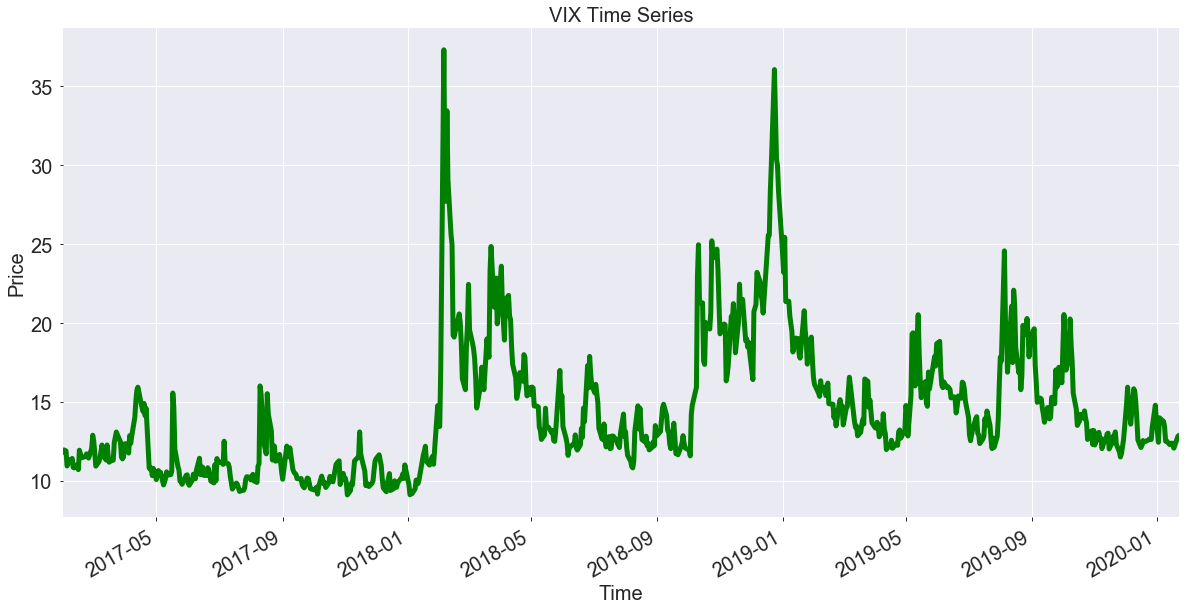

In [7]:
IndexData['VixClose'].plot(figsize=(20,10), linewidth=5, fontsize=20, color ='green')
plt.xlabel('Time', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.title('VIX Time Series', fontsize=20)
plt.show()

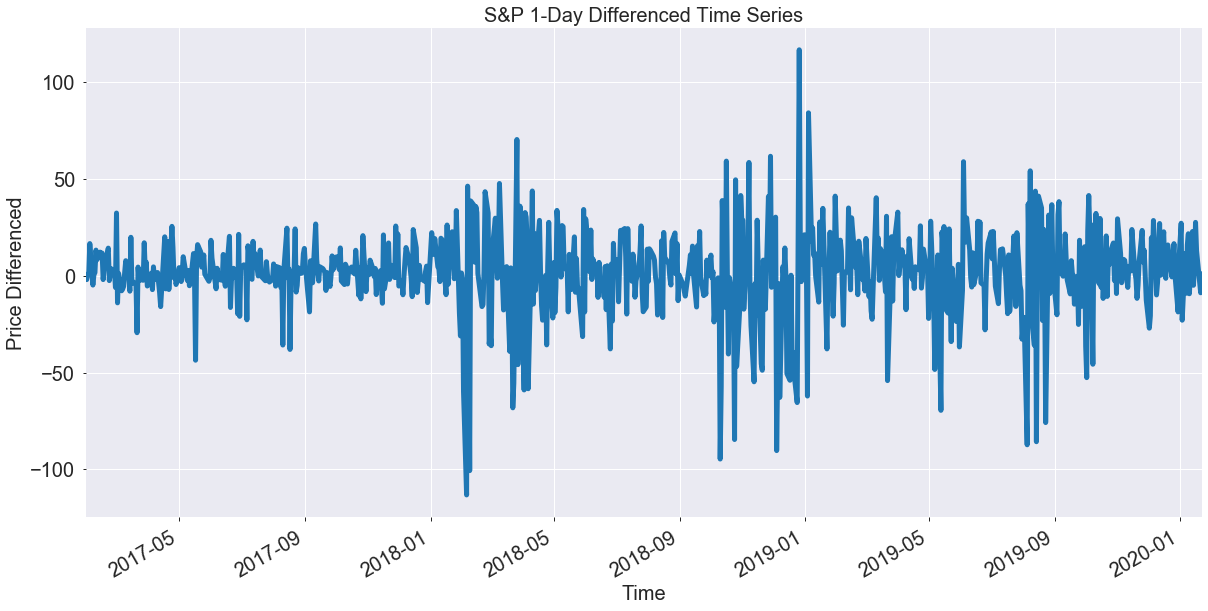

In [8]:
IndexData['IndexClose'].diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Price Differenced', fontsize=20)
plt.title('S&P 1-Day Differenced Time Series', fontsize=20)
plt.show()

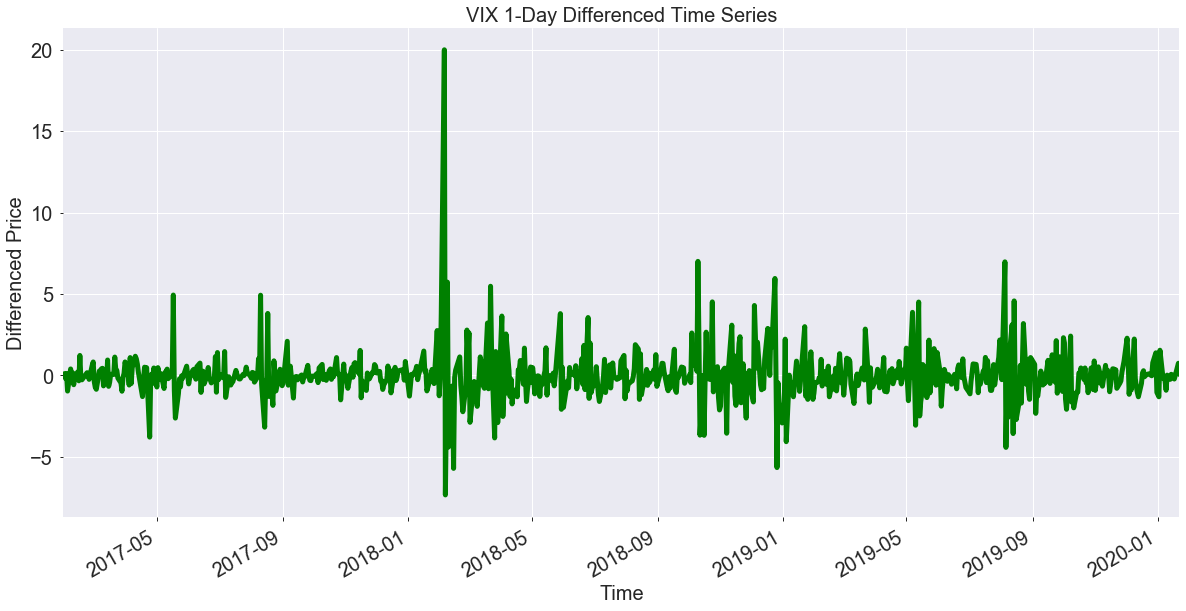

In [9]:
IndexData['VixClose'].diff().plot(figsize=(20,10), linewidth=5, fontsize=20, color='green')
plt.xlabel('Time', fontsize=20)
plt.ylabel('Differenced Price', fontsize=20)
plt.title('VIX 1-Day Differenced Time Series', fontsize=20)
plt.show()

In [10]:
Shocks=IndexData.diff()

In [11]:
Shocks

,IndexClose,VixClose
Date,,
2017-01-30,NaN,NaN
2017-01-31,-2.029785,0.11
2017-02-01,0.679932,-0.18
2017-02-02,1.300049,0.12
2017-02-03,16.569824,-0.96
...,...,...
2020-01-15,6.140137,0.03
2020-01-16,27.520020,-0.10
2020-01-17,12.810058,-0.22


In [12]:
df_merge = pd.merge(IndexData,Shocks, on='Date')

In [13]:
df_merge

,IndexClose_x,VixClose_x,IndexClose_y,VixClose_y
Date,,,,
2017-01-30,2280.899902,11.88,NaN,NaN
2017-01-31,2278.870117,11.99,-2.029785,0.11
2017-02-01,2279.550049,11.81,0.679932,-0.18
2017-02-02,2280.850098,11.93,1.300049,0.12
2017-02-03,2297.419922,10.97,16.569824,-0.96
...,...,...,...,...
2020-01-15,3289.290039,12.42,6.140137,0.03
2020-01-16,3316.810059,12.32,27.520020,-0.10
2020-01-17,3329.620117,12.10,12.810058,-0.22


In [14]:
df_merge['IndexReturn']=df_merge['IndexClose_y'] / df_merge['IndexClose_x'].shift(1)

In [15]:
df_merge['VixReturn']=df_merge['VixClose_y'] / df_merge['VixClose_x'].shift(1)

In [16]:
df_merge

,IndexClose_x,VixClose_x,IndexClose_y,VixClose_y,IndexReturn,VixReturn
Date,,,,,,
2017-01-30,2280.899902,11.88,NaN,NaN,NaN,NaN
2017-01-31,2278.870117,11.99,-2.029785,0.11,-0.000890,0.009259
2017-02-01,2279.550049,11.81,0.679932,-0.18,0.000298,-0.015013
2017-02-02,2280.850098,11.93,1.300049,0.12,0.000570,0.010161
2017-02-03,2297.419922,10.97,16.569824,-0.96,0.007265,-0.080469
...,...,...,...,...,...,...
2020-01-15,3289.290039,12.42,6.140137,0.03,0.001870,0.002421
2020-01-16,3316.810059,12.32,27.520020,-0.10,0.008367,-0.008052
2020-01-17,3329.620117,12.10,12.810058,-0.22,0.003862,-0.017857


In [17]:
df_merge.drop(df_merge.head(1).index, inplace=True)

In [18]:
df_merge=df_merge.drop(['IndexClose_y','VixClose_y'],axis=1)

In [19]:
df_merge

,IndexClose_x,VixClose_x,IndexReturn,VixReturn
Date,,,,
2017-01-31,2278.870117,11.99,-0.000890,0.009259
2017-02-01,2279.550049,11.81,0.000298,-0.015013
2017-02-02,2280.850098,11.93,0.000570,0.010161
2017-02-03,2297.419922,10.97,0.007265,-0.080469
2017-02-06,2292.560059,11.37,-0.002115,0.036463
...,...,...,...,...
2020-01-15,3289.290039,12.42,0.001870,0.002421
2020-01-16,3316.810059,12.32,0.008367,-0.008052
2020-01-17,3329.620117,12.10,0.003862,-0.017857


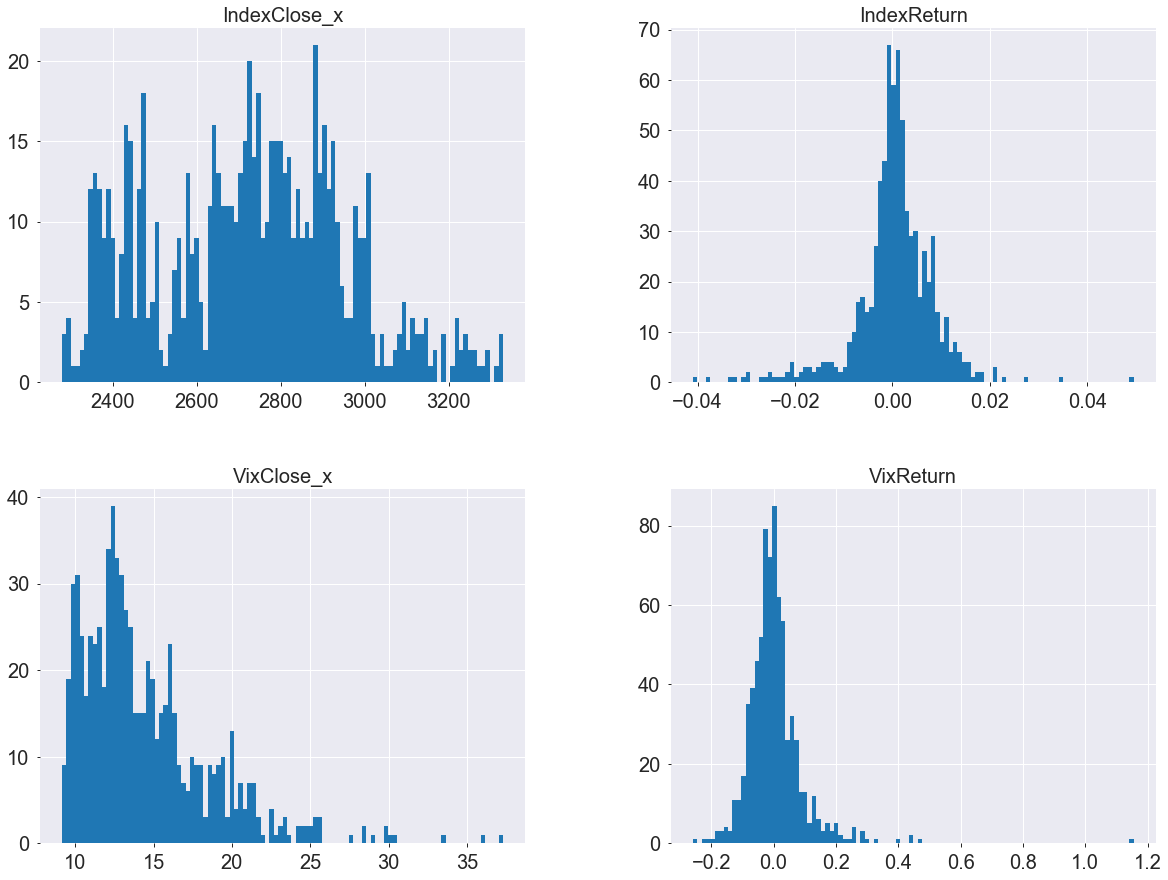

In [20]:
params = {'axes.titlesize':'20',
          'xtick.labelsize':'20',
          'ytick.labelsize':'20',
            }
mlp.rcParams.update(params)
df_merge.hist(figsize=(20,15),bins=100)
plt.show()

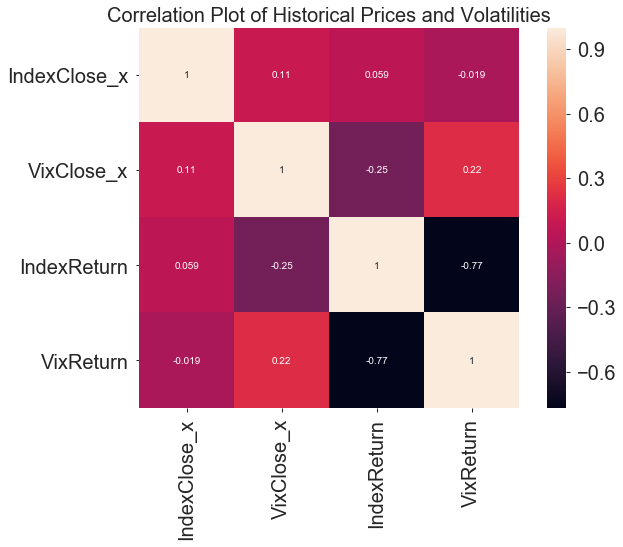

In [21]:
plt.figure(figsize=(10,7))
plt.title('Correlation Plot of Historical Prices and Volatilities')
plt.yticks(rotation=45)
sns.heatmap(df_merge.corr(),annot=True, square=True)
plt.show()

## https://tradingninja.com/2017/01/black-scholes-options-price-calculator-python-code/


In [22]:
from math import *

#first define these 2 functions
def d1(S,X,T,r,sigma):
    return (log(S/X)+(r+sigma*sigma/2.)*T)/(sigma*sqrt(T))

def d2(S,X,T,r,sigma):
    return d1(S,X,T,r,sigma)-sigma*sqrt(T)

#define the call option price function
def bs_call(S,X,T,r,sigma):
    return S*CND(d1(S,X,T,r,sigma))-X*exp(-r*T)*CND(d2(S,X,T,r,sigma))

#define the put options price function
def bs_put(S,X,T,r,sigma):
    return X*exp(-r*T)-S + bs_call(S,X,T,r,sigma)

#define cumulative standard normal distribution
def CND(X):
     (a1,a2,a3,a4,a5)=(0.31938153,-0.356563782,1.781477937,-1.821255978,1.330274429)
     L = abs(X)
     K=1.0/(1.0+0.2316419*L)
     w=1.0-1.0/sqrt(2*pi)*exp(-L*L/2.)*(a1*K+a2*K*K+a3*pow(K,3)+a4*pow(K,4)+a5*pow(K,5))
     if X<0:
        w=1.0-w
     return w

## https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o

In [23]:
def black_scholes_row(row):
    row['AnalyticalCallVal']= bs_call(row['IndexClose_x'],row['IndexClose_x'],31/365,0.015,row['VixClose_x']/100)
    row['AnalyticalPutVal']= bs_put(row['IndexClose_x'],row['IndexClose_x'],31/365,0.015,row['VixClose_x']/100)
    return row


In [24]:
df_merge=df_merge.apply(lambda row: black_scholes_row(row), axis=1)

In [25]:
df_merge

,IndexClose_x,VixClose_x,IndexReturn,VixReturn,AnalyticalCallVal,AnalyticalPutVal
Date,,,,,,
2017-01-31,2278.870117,11.99,-0.000890,0.009259,33.217525,30.316156
2017-02-01,2279.550049,11.81,0.000298,-0.015013,32.751078,29.848843
2017-02-02,2280.850098,11.93,0.000570,0.010161,33.087509,30.183618
2017-02-03,2297.419922,10.97,0.007265,-0.080469,30.767502,27.842516
2017-02-06,2292.560059,11.37,-0.002115,0.036463,31.766955,28.848156
...,...,...,...,...,...,...
2020-01-15,3289.290039,12.42,0.001870,0.002421,49.587800,45.400003
2020-01-16,3316.810059,12.32,0.008367,-0.008052,49.617601,45.394766
2020-01-17,3329.620117,12.10,0.003862,-0.017857,48.958798,44.719654


In [26]:
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel, RBF
from sklearn.preprocessing import StandardScaler as sc
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [27]:
index_X_train=df_merge[['IndexClose_x','VixClose_x']][0:500]
index_X_test=df_merge[['IndexClose_x','VixClose_x']][500:]
index_y_train=df_merge[['AnalyticalCallVal','AnalyticalPutVal']][0:500]
index_y_test=df_merge[['AnalyticalCallVal','AnalyticalPutVal']][500:]


#sc.fit(index_X_train)
#X_train_std = sc.transform(index_X_train)
#X_test_std = sc.transform(index_X_test)

In [28]:
index_y_train.shape, index_X_train.shape

((500, 2), (500, 2))

## https://realpython.com/linear-regression-in-python/

In [30]:
from sklearn.preprocessing import PolynomialFeatures
transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer.fit(index_X_train)
x_ = transformer.transform(index_X_train)
x__ = transformer.transform(index_X_test)
#print(x_)
model = LinearRegression().fit(x_, index_y_train)
r_sq = model.score(x_, index_y_train)

index_y_pred = model.predict(x__)
r_sq

print('input coeficients: ',model.coef_)
print('input intercepts: ',model.intercept_)

input coeficients:  [[ 7.37560172e-04  3.02055176e-05 -1.64050802e-08  1.16124870e-03
  -1.68241215e-05]
 [-5.35601273e-04  3.02055176e-05 -1.64050802e-08  1.16124870e-03
  -1.68241215e-05]]
input intercepts:  [-0.1058957 -0.1058957]


C:\Users\hajyhass\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [31]:
index_y_test.tail(50)

,AnalyticalCallVal,AnalyticalPutVal
Date,,
2019-11-08,45.372980,41.434990
2019-11-11,47.506011,43.575749
2019-11-12,47.544444,43.608033
2019-11-13,48.727799,44.788587
2019-11-14,48.948352,45.005842
2019-11-15,45.702166,41.729317
2019-11-18,47.211253,43.236405
2019-11-19,48.632305,44.659812
2019-11-20,48.160913,44.203342


In [32]:
index_y_pred

array([[59.65807504, 56.29202703],
       [60.36811941, 57.0069732 ],
       [56.73094765, 53.3175381 ],
       [53.79646464, 50.35370865],
       [52.49354772, 49.04769804],
       [51.5520479 , 48.08284833],
       [51.28613171, 47.80059769],
       [50.56947645, 47.09169578],
       [53.20687904, 49.76164045],
       [51.19923948, 47.75167122],
       [52.02209957, 48.57208662],
       [50.97163675, 47.47715237],
       [51.82895195, 48.32390026],
       [53.50869786, 50.01294031],
       [49.86894802, 46.33516099],
       [49.84683706, 46.30775379],
       [47.1547738 , 43.60940119],
       [48.40617466, 44.87330458],
       [45.63597848, 42.08045881],
       [50.04252492, 46.48262534],
       [51.04104356, 47.48395793],
       [49.48946255, 45.93431215],
       [49.60832341, 46.06321811],
       [46.01130326, 42.44175333],
       [49.27009581, 45.71439772],
       [49.57065776, 46.01898306],
       [52.46522962, 48.93672639],
       [54.75196302, 51.25213142],
       [52.91544632,

In [33]:
data = pd.DataFrame({'predcall': index_y_pred[0:,0],'predput': index_y_pred[0:,1],'testcall': index_y_test.iloc[0:,0],'testput': index_y_test.iloc[0:,1]})
#data = pd.DataFrame({'testcall': index_y_test.iloc[0:,0],'testput': index_y_test.iloc[0:,1]})



## Calls Tests Vs Predictions

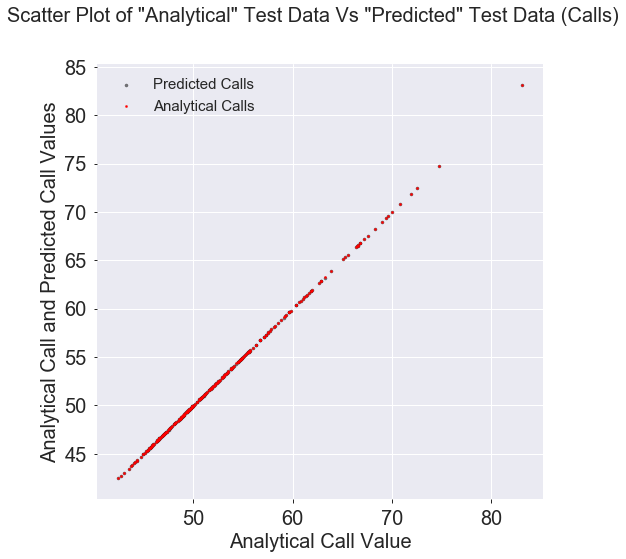

In [34]:
##prediction call vs analytical call
X = data['testcall']
Y1 = data['predcall']
Y2 = data['testcall']


fig, ax = plt.subplots(figsize=(8,8))
fig.suptitle('Scatter Plot of "Analytical" Test Data Vs "Predicted" Test Data (Calls)', fontsize=20)
plt.scatter(X,Y1, color='k', s=10, alpha=0.5, label='Predicted Calls')
plt.scatter(X,Y2, color='r',s=5, alpha=1.0,label='Analytical Calls')
plt.xlabel('Analytical Call Value', size=20)
plt.ylabel('Analytical Call and Predicted Call Values', size=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(fontsize=15)
plt.show()

## Puts Tests Vs Predictions

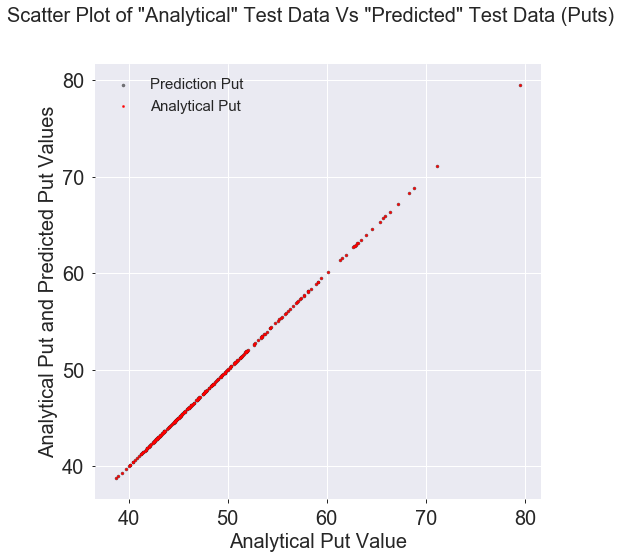

In [35]:
X = data['testput']
Y1 = data['predput']
Y2 = data['testput']


fig, ax = plt.subplots(figsize=(8,8))
fig.suptitle('Scatter Plot of "Analytical" Test Data Vs "Predicted" Test Data (Puts)', fontsize=20)
plt.scatter(X,Y1, color='k', s=10, alpha=0.5, label='Prediction Put')
plt.scatter(X,Y2, color='r',s=5, alpha=1.0,label='Analytical Put')
plt.xlabel('Analytical Put Value',size=20)
plt.ylabel('Analytical Put and Predicted Put Values', size=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(fontsize=15)
plt.show()


## From the scatter plots above: The Polynomial looks promising

In [36]:
##Erros in % for calls
CallErrors=100*(data['predcall']-data['testcall'])/data['testcall']
CallErrors.tail(50)

Date
2019-11-08   -0.006895
2019-11-11   -0.005836
2019-11-12   -0.006006
2019-11-13   -0.005751
2019-11-14   -0.005789
2019-11-15   -0.007904
2019-11-18   -0.007313
2019-11-19   -0.006756
2019-11-20   -0.006448
2019-11-21   -0.005943
2019-11-22   -0.007074
2019-11-25   -0.008730
2019-11-26   -0.009722
2019-11-27   -0.009746
2019-11-29   -0.007766
2019-12-02   -0.005439
2019-12-03   -0.004842
2019-12-04   -0.005426
2019-12-05   -0.005628
2019-12-06   -0.006947
2019-12-09   -0.005980
2019-12-10   -0.005890
2019-12-11   -0.006232
2019-12-12   -0.007485
2019-12-13   -0.008758
2019-12-16   -0.010424
2019-12-17   -0.010190
2019-12-18   -0.009664
2019-12-19   -0.010334
2019-12-20   -0.010937
2019-12-23   -0.010885
2019-12-24   -0.010766
2019-12-26   -0.011448
2019-12-27   -0.010425
2019-12-30   -0.008777
2019-12-31   -0.009752
2020-01-02   -0.012481
2020-01-03   -0.009705
2020-01-06   -0.010253
2020-01-07   -0.009974
2020-01-08   -0.010893
2020-01-09   -0.013050
2020-01-10   -0.012628
2020-0

In [37]:
print('average error for analytical calls vs predictied calls (in percentage): ' ,CallErrors.sum()/len(data['testcall']))

average error for analytical calls vs predictied calls (in percentage):  -0.0027239046897191217


In [38]:
##Erros in % for puts
PutErrors=100*(data['predput']-data['testput'])/data['testput']
PutErrors.tail(50)

Date
2019-11-08   -0.007550
2019-11-11   -0.006363
2019-11-12   -0.006549
2019-11-13   -0.006257
2019-11-14   -0.006296
2019-11-15   -0.008656
2019-11-18   -0.007986
2019-11-19   -0.007357
2019-11-20   -0.007026
2019-11-21   -0.006460
2019-11-22   -0.007731
2019-11-25   -0.009574
2019-11-26   -0.010691
2019-11-27   -0.010699
2019-11-29   -0.008470
2019-12-02   -0.005854
2019-12-03   -0.005186
2019-12-04   -0.005843
2019-12-05   -0.006069
2019-12-06   -0.007529
2019-12-09   -0.006407
2019-12-10   -0.006316
2019-12-11   -0.006705
2019-12-12   -0.008098
2019-12-13   -0.009551
2019-12-16   -0.011409
2019-12-17   -0.011141
2019-12-18   -0.010543
2019-12-19   -0.011281
2019-12-20   -0.011939
2019-12-23   -0.011873
2019-12-24   -0.011739
2019-12-26   -0.012484
2019-12-27   -0.011311
2019-12-30   -0.009450
2019-12-31   -0.010559
2020-01-02   -0.013628
2020-01-03   -0.010494
2020-01-06   -0.011097
2020-01-07   -0.010799
2020-01-08   -0.011817
2020-01-09   -0.014242
2020-01-10   -0.013779
2020-0

In [39]:
#Average analytical put vs predicted put error
print('average error for analytical puts vs predictied puts (in percentage): ' ,PutErrors.sum()/len(data['testput']))

average error for analytical puts vs predictied puts (in percentage):  -0.002956877110948261


## Time-Series of Forecast Errors (Predictions Vs Analyticals) 

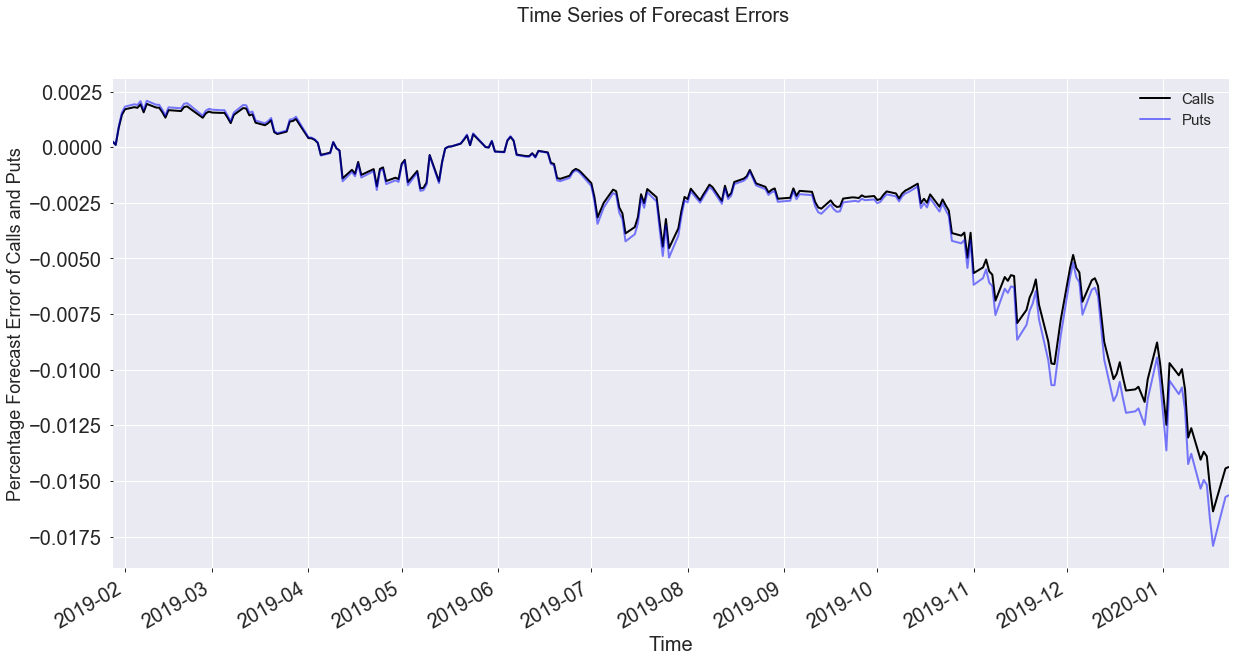

In [40]:

fig, ax = plt.subplots(figsize=(20,10))
fig.suptitle('Time Series of Forecast Errors', fontsize=20)
CallErrors.plot(linewidth=2, fontsize=20, color='black', alpha=1.0, label='Calls')
PutErrors.plot(linewidth=2, fontsize=20, color='blue', alpha=0.5, label='Puts')
#plt.title('Time Series of Call Errors', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Percentage Forecast Error of Calls and Puts', fontsize=18)
plt.legend(fontsize=15)
plt.show()


## From the above -> Errors are by order of magnitude smaller than any other model. When S&P 500 rallies up, the model errors increase

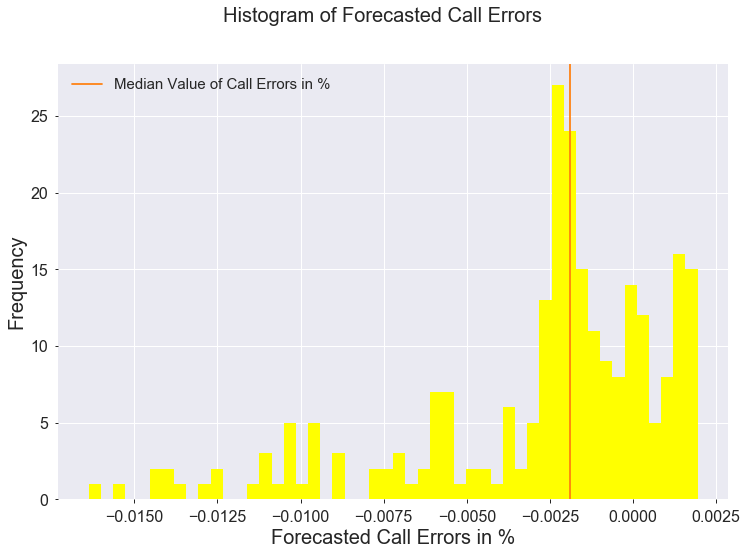

In [41]:
median=CallErrors.sort_values(ascending=True).iloc[round(0.5*len(CallErrors))]
fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle('Histogram of Forecasted Call Errors', fontsize=20)
CallErrors.hist(bins=50, color='yellow')
plt.ylabel('Frequency', fontsize=20)
plt.xlabel('Forecasted Call Errors in %', fontsize=20)
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.axvline(median, label='Median Value of Call Errors in %',color='C1')
plt.legend(fontsize=15)
plt.show()

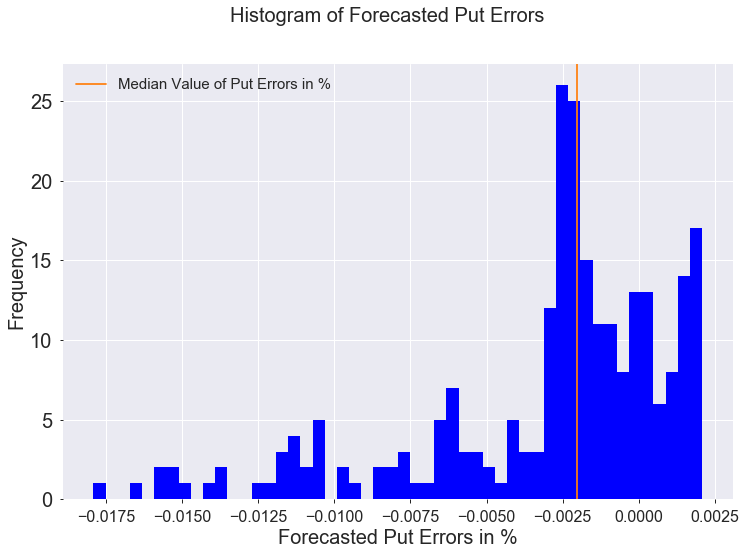

In [42]:
median=PutErrors.sort_values(ascending=True).iloc[round(0.5*len(PutErrors))]
fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle('Histogram of Forecasted Put Errors', fontsize=20)
PutErrors.hist(bins=50, color='blue')
plt.ylabel('Frequency', fontsize=20)
plt.xlabel('Forecasted Put Errors in %', fontsize=20)
plt.xticks(size = 16)
plt.yticks(size = 20)
plt.axvline(median, label='Median Value of Put Errors in %',color='C1')
plt.legend(fontsize=15)
plt.show()

## Below, applying 749 shocks to S&P index closing price of 3845.78 and VIX of 68.96. The extreme unseens shocks just to test the model robustness

In [102]:
##original data
df_merge

,IndexClose_x,VixClose_x,IndexReturn,VixReturn,AnalyticalCallVal,AnalyticalPutVal
Date,,,,,,
2017-01-31,2278.870117,11.99,-0.000890,0.009259,33.217525,30.316156
2017-02-01,2279.550049,11.81,0.000298,-0.015013,32.751078,29.848843
2017-02-02,2280.850098,11.93,0.000570,0.010161,33.087509,30.183618
2017-02-03,2297.419922,10.97,0.007265,-0.080469,30.767502,27.842516
2017-02-06,2292.560059,11.37,-0.002115,0.036463,31.766955,28.848156
...,...,...,...,...,...,...
2020-01-15,3289.290039,12.42,0.001870,0.002421,49.587800,45.400003
2020-01-16,3316.810059,12.32,0.008367,-0.008052,49.617601,45.394766
2020-01-17,3329.620117,12.10,0.003862,-0.017857,48.958798,44.719654


In [103]:
shock = pd.DataFrame({'id':[i for i in range(749)],'PresentValue' : [3845.78]*749 , 'PresentVolatility' : [68.96]*749, 'IndexShock': df_merge['IndexReturn']+1,'VixShock': df_merge['VixReturn']+1})

In [74]:
shock.head()

,id,PresentValue,PresentVolatility,IndexShock,VixShock
Date,,,,,
2017-01-31,0,3845.78,5.96,0.999110,1.009259
2017-02-01,1,3845.78,5.96,1.000298,0.984987
2017-02-02,2,3845.78,5.96,1.000570,1.010161
2017-02-03,3,3845.78,5.96,1.007265,0.919531
2017-02-06,4,3845.78,5.96,0.997885,1.036463


In [75]:
shock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 749 entries, 2017-01-31 to 2020-01-22
Data columns (total 5 columns):
id                   749 non-null int64
PresentValue         749 non-null float64
PresentVolatility    749 non-null float64
IndexShock           749 non-null float64
VixShock             749 non-null float64
dtypes: float64(4), int64(1)
memory usage: 35.1 KB


In [76]:
shock=shock.reset_index()

In [77]:
shock = shock.drop(shock.columns[[0, 1]], axis=1)

In [78]:
shock['PresentValueShockIncorporated']=shock['PresentValue']*shock['IndexShock']
shock['PresentVolatilityShockIncorporated']=shock['PresentVolatility']*shock['VixShock']

In [79]:
shock

,PresentValue,PresentVolatility,IndexShock,VixShock,PresentValueShockIncorporated,PresentVolatilityShockIncorporated
0,3845.78,5.96,0.999110,1.009259,3842.357620,6.015185
1,3845.78,5.96,1.000298,0.984987,3846.927441,5.870525
2,3845.78,5.96,1.000570,1.010161,3847.973285,6.020559
3,3845.78,5.96,1.007265,0.919531,3873.718661,5.480402
4,3845.78,5.96,0.997885,1.036463,3837.644803,6.177320
...,...,...,...,...,...,...
744,3845.78,5.96,1.001870,1.002421,3852.972366,5.974431
745,3845.78,5.96,1.008367,0.991948,3877.955923,5.912013
746,3845.78,5.96,1.003862,0.982143,3860.633026,5.853571
747,3845.78,5.96,0.997348,1.061983,3835.581078,6.329421


## Pricing the 499 schock scenarios, using the parameters of Gaussian Regression which was tuned  in section 3 

In [80]:
indexXtest=shock[['PresentValueShockIncorporated','PresentVolatilityShockIncorporated']]


#########indexypred= gpr.predict(indexXtest)
#gp.predict(indexXtest, return_std=True)
#gp.score(indexXtest,indexypred)



#transformer = PolynomialFeatures(degree=2, include_bias=False)
#transformer.fit(index_X_train)
#x_ = transformer.transform(index_X_train)
x___ = transformer.transform(indexXtest)
#print(x_)
#model = LinearRegression().fit(x_, index_y_train)
#r_sq = model.score(x_, index_y_train)

indexypred = model.predict(x___)

In [81]:
indexypred

array([[29.3247993 , 24.43285772],
       [28.71330896, 23.81554926],
       [29.39146988, 24.49237866],
       ...,
       [28.73911295, 23.82390383],
       [30.67289243, 25.78957848],
       [29.23704109, 24.33932687]])

In [82]:
future_data_reg_dependent = pd.DataFrame({'predcall': indexypred[0:,0],'predput': indexypred[0:,1]})

In [83]:
a=future_data_reg_dependent['predcall'].sort_values(ascending=True)
b=future_data_reg_dependent['predput'].sort_values(ascending=True)

In [84]:
#1st percentile predicted calls
first_predicted_call=a.iloc[round(0.01*len(a))]
#fiftyth percentile predicted calls
fiftyth_predicted_call=a.iloc[round(0.50*len(a))]
#99th percentile predicted calls
ninteyninth_predicted_call=a.iloc[round(0.99*len(a))]
#print(fifth,ninteyfifth)

## Predicted Call, Value At Risk

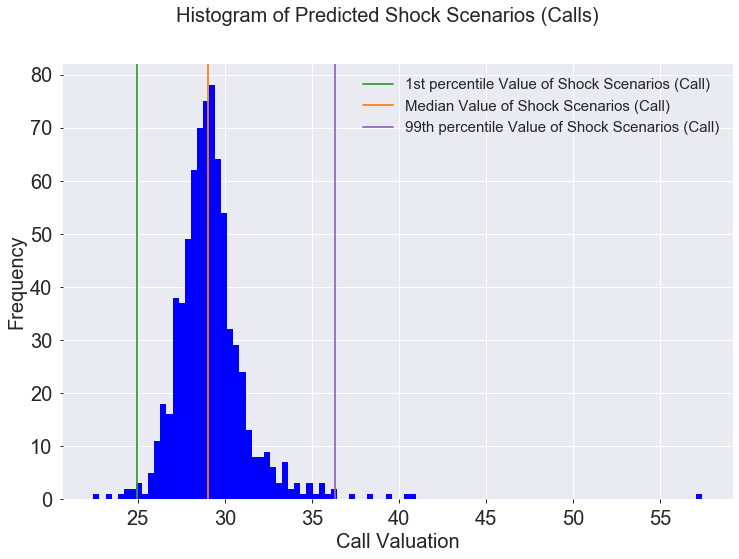

In [85]:
fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle('Histogram of Predicted Shock Scenarios (Calls)', fontsize=20)
future_data_reg_dependent['predcall'].hist(bins=100, color='blue')
plt.ylabel('Frequency', fontsize=20)
plt.xlabel('Call Valuation', fontsize=20)
plt.axvline(first_predicted_call,label='1st percentile Value of Shock Scenarios (Call)',color='C2')
plt.axvline(fiftyth_predicted_call,label='Median Value of Shock Scenarios (Call)',color='C1')
plt.axvline(ninteyninth_predicted_call,label='99th percentile Value of Shock Scenarios (Call)',color='C4')
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(fontsize=15)
plt.show()

## Predicted Put, Value At Risk

In [86]:
#1st percentile predicted put
first_predicted_put=b.iloc[round(0.01*len(b))]
#fiftyth percentile predicted put
fiftyth_predicted_put=b.iloc[round(0.50*len(b))]
#99th percentile predicted put
ninteyninth_predicted_put=b.iloc[round(0.99*len(b))]

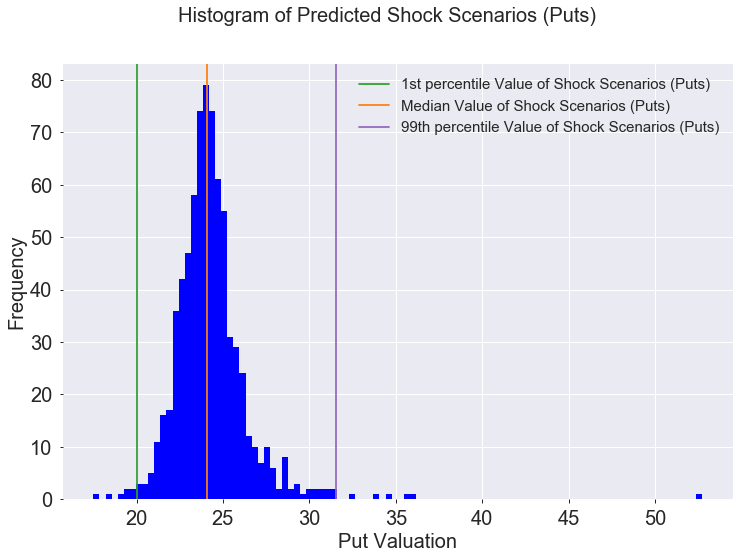

In [87]:
fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle('Histogram of Predicted Shock Scenarios (Puts)', fontsize=20)
future_data_reg_dependent['predput'].hist(bins=100, color='blue')
plt.ylabel('Frequency', fontsize=20)
plt.xlabel('Put Valuation', fontsize=20)
plt.axvline(first_predicted_put,label='1st percentile Value of Shock Scenarios (Puts)',color='C2')
plt.axvline(fiftyth_predicted_put,label='Median Value of Shock Scenarios (Puts)',color='C1')
plt.axvline(ninteyninth_predicted_put,label='99th percentile Value of Shock Scenarios (Puts)',color='C4')
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(fontsize=15)
plt.show()

## Below: Applying analytical BS onto the 749 shock scenarios:

In [89]:
indexXtest

,PresentValueShockIncorporated,PresentVolatilityShockIncorporated
0,3842.357620,6.015185
1,3846.927441,5.870525
2,3847.973285,6.020559
3,3873.718661,5.480402
4,3837.644803,6.177320
...,...,...
744,3852.972366,5.974431
745,3877.955923,5.912013
746,3860.633026,5.853571
747,3835.581078,6.329421


In [90]:
def black_scholes_row(row):
    row['ShockAnalyticalCallVal']= bs_call(row['PresentValueShockIncorporated'],row['PresentValueShockIncorporated'],31/365,0.015,row['PresentVolatilityShockIncorporated']/100)
    row['ShockAnalyticalPutVal']= bs_put(row['PresentValueShockIncorporated'],row['PresentValueShockIncorporated'],31/365,0.015,row['PresentVolatilityShockIncorporated']/100)
    return row


FutureAnalyticalShock=indexXtest.apply(lambda row: black_scholes_row(row), axis=1)
FutureAnalyticalShock

,PresentValueShockIncorporated,PresentVolatilityShockIncorporated,ShockAnalyticalCallVal,ShockAnalyticalPutVal
0,3842.357620,6.015185,29.370851,24.478909
1,3846.927441,5.870525,28.760961,23.863201
2,3847.973285,6.020559,29.437738,24.538647
3,3873.718661,5.480402,27.210632,22.278763
4,3837.644803,6.177320,30.055895,25.169953
...,...,...,...,...
744,3852.972366,5.974431,29.270034,24.364578
745,3877.955923,5.912013,29.179354,24.242090
746,3860.633026,5.853571,28.787592,23.872383
747,3835.581078,6.329421,30.715900,25.832586


In [91]:
indexytest=FutureAnalyticalShock[['ShockAnalyticalCallVal','ShockAnalyticalPutVal']]

In [92]:
c=FutureAnalyticalShock['ShockAnalyticalCallVal'].sort_values(ascending=True)
d=FutureAnalyticalShock['ShockAnalyticalPutVal'].sort_values(ascending=True)

#1st percentile future analytical shock calls
first_analytical_call=c.iloc[round(0.01*len(c))]
#fiftyth percentile future analytical shock calls
fiftyth_analytical_call=c.iloc[round(0.50*len(c))]
#99th percentile future analytical shock calls
ninteyninth_analytical_call=c.iloc[round(0.99*len(c))]


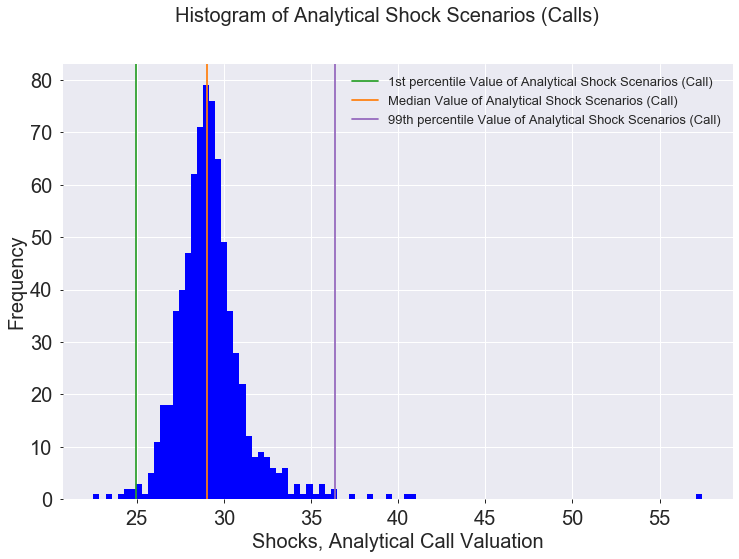

In [93]:
fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle('Histogram of Analytical Shock Scenarios (Calls)', fontsize=20)
FutureAnalyticalShock['ShockAnalyticalCallVal'].hist(bins=100, color='blue')
plt.ylabel('Frequency', fontsize=20)
plt.xlabel('Shocks, Analytical Call Valuation', fontsize=20)
plt.axvline(first_analytical_call,label='1st percentile Value of Analytical Shock Scenarios (Call)',color='C2')
plt.axvline(fiftyth_analytical_call,label='Median Value of Analytical Shock Scenarios (Call)',color='C1')
plt.axvline(ninteyninth_analytical_call,label='99th percentile Value of Analytical Shock Scenarios (Call)',color='C4')
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(fontsize=13)
plt.show()

In [94]:
#1st percentile future analytical shock put
first_analytical_put=d.iloc[round(0.01*len(d))]
#fiftyth percentile future analytical shock put
fiftyth_analytical_put=d.iloc[round(0.50*len(d))]
#99th percentile future analytical shock put
ninteyninth_analytical_put=d.iloc[round(0.99*len(d))]

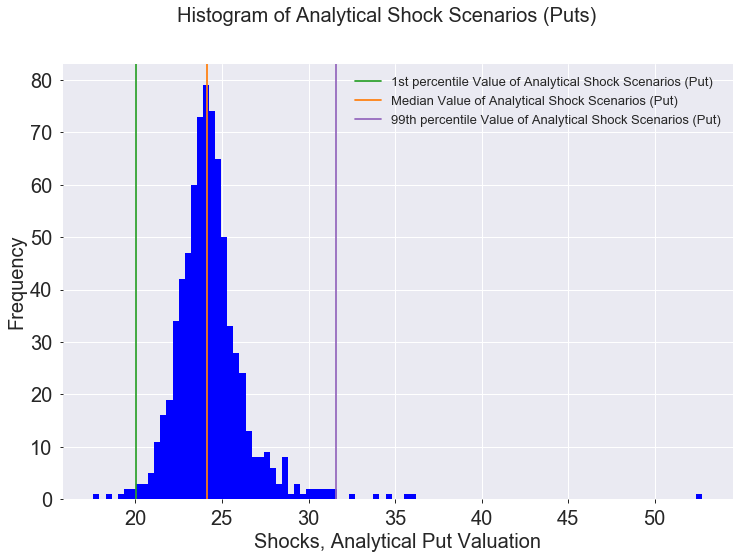

In [95]:
fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle('Histogram of Analytical Shock Scenarios (Puts)', fontsize=20)
FutureAnalyticalShock['ShockAnalyticalPutVal'].hist(bins=100, color='blue')
plt.ylabel('Frequency', fontsize=20)
plt.xlabel('Shocks, Analytical Put Valuation', fontsize=20)
plt.axvline(first_analytical_put,label='1st percentile Value of Analytical Shock Scenarios (Put)',color='C2')
plt.axvline(fiftyth_analytical_put,label='Median Value of Analytical Shock Scenarios (Put)',color='C1')
plt.axvline(ninteyninth_analytical_put,label='99th percentile Value of Analytical Shock Scenarios (Put)',color='C4')
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(fontsize=13)
plt.show()

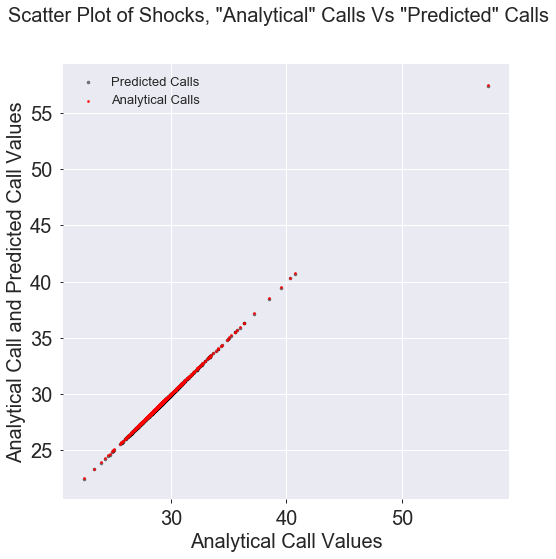

In [96]:
##prediction call vs analytical call
X = FutureAnalyticalShock['ShockAnalyticalCallVal']
Y1 = future_data_reg_dependent['predcall']
Y2 = FutureAnalyticalShock['ShockAnalyticalCallVal']


fig, ax = plt.subplots(figsize=(8,8))
fig.suptitle('Scatter Plot of Shocks, "Analytical" Calls Vs "Predicted" Calls', fontsize=20)
plt.scatter(X,Y1, color='k', s=10, alpha=0.5, label='Predicted Calls')
plt.scatter(X,Y2, color='r',s=5, alpha=1.0, label='Analytical Calls')
plt.xlabel('Analytical Call Values', size=20)
plt.ylabel('Analytical Call and Predicted Call Values', size=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(fontsize=13)
plt.show()

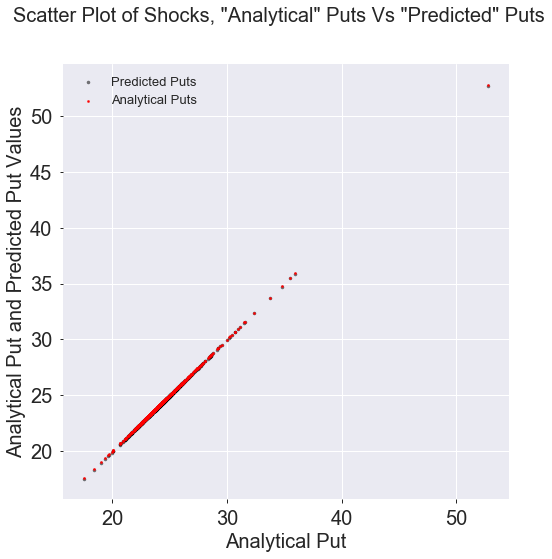

In [97]:
X = FutureAnalyticalShock['ShockAnalyticalPutVal']
Y1 = future_data_reg_dependent['predput']
Y2 = FutureAnalyticalShock['ShockAnalyticalPutVal']


fig, ax = plt.subplots(figsize=(8,8))
fig.suptitle('Scatter Plot of Shocks, "Analytical" Puts Vs "Predicted" Puts', fontsize=20)
plt.scatter(X,Y1, color='k', s=10, alpha=0.5, label='Predicted Puts')
plt.scatter(X,Y2, color='r',s=5, alpha=1.0, label='Analytical Puts')
plt.xlabel('Analytical Put', size=20)
plt.ylabel('Analytical Put and Predicted Put Values', size=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(fontsize=13)
plt.show()

## From the scatter plots above: Scatter plots look excellent

In [98]:
ShockCallErrors=100*(future_data_reg_dependent['predcall']-FutureAnalyticalShock['ShockAnalyticalCallVal'])/FutureAnalyticalShock['ShockAnalyticalCallVal']
ShockPutErrors=100*(future_data_reg_dependent['predput']-FutureAnalyticalShock['ShockAnalyticalPutVal'])/FutureAnalyticalShock['ShockAnalyticalPutVal']

print('average error for Historical Data, analytical calls vs predictied calls (in percentage): ' ,CallErrors.sum()/len(data['testcall']))
print('average error for Historical Data: puts vs predictied puts (in percentage): ' ,PutErrors.sum()/len(data['testput']))
print('average error for Shocks, analytical calls vs predictied calls (in percentage): ' ,ShockCallErrors.sum()/len(future_data_reg_dependent['predcall']))
print('average error for Shocks, analytical puts vs predictied puts (in percentage): ' ,ShockPutErrors.sum()/len(future_data_reg_dependent['predput']))

average error for Historical Data, analytical calls vs predictied calls (in percentage):  -0.0027239046897191217
average error for Historical Data: puts vs predictied puts (in percentage):  -0.002956877110948261
average error for Shocks, analytical calls vs predictied calls (in percentage):  -0.1631857251034067
average error for Shocks, analytical puts vs predictied puts (in percentage):  -0.19675723977382722


In [99]:
print("Historical Data R^2 train: ",model.score(x_, index_y_train))
print("Historical Data R^2 test: ",model.score(x__,index_y_test))
print("Historical Data R^2 prediction: ",model.score(x__,index_y_pred))
print("Future Shock R^2 shock test: ",model.score(x___,indexytest))
print("Future Shock R^2 shock prediction: ",model.score(x___,indexypred))


Historical Data R^2 train:  0.9999999971107227
Historical Data R^2 test:  0.9999998784581129
Historical Data R^2 prediction:  1.0
Future Shock R^2 shock test:  0.9995440944241102
Future Shock R^2 shock prediction:  1.0


C:\Users\hajyhass\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\hajyhass\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_avera

In [100]:
ShockPutErrors=100*(future_data_reg_dependent['predput']-FutureAnalyticalShock['ShockAnalyticalPutVal'])/FutureAnalyticalShock['ShockAnalyticalPutVal']
ShockCallErrors=100*(future_data_reg_dependent['predcall']-FutureAnalyticalShock['ShockAnalyticalCallVal'])/FutureAnalyticalShock['ShockAnalyticalCallVal']

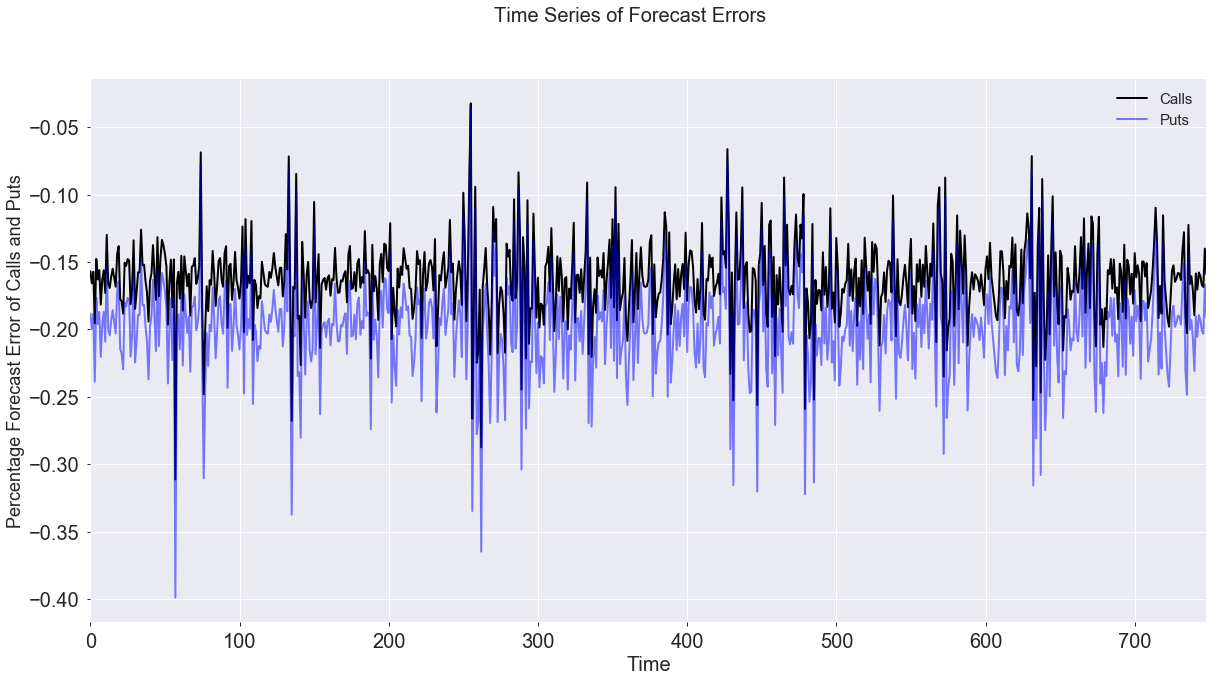

In [101]:
fig, ax = plt.subplots(figsize=(20,10))
fig.suptitle('Time Series of Forecast Errors', fontsize=20)
ShockCallErrors.plot(linewidth=2, fontsize=20, color='black', alpha=1.0, label='Calls')
ShockPutErrors.plot(linewidth=2, fontsize=20, color='blue', alpha=0.5, label='Puts')
#plt.title('Time Series of Call Errors', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Percentage Forecast Error of Calls and Puts', fontsize=18)
plt.legend(fontsize=15)
plt.show()